#### [ 산점도 그래프 ]
- 두개의 컬럼(변수)의 관계를 시각화해서 표현
- 연속형(수치형) 데이터에 사용함

In [2]:
# [1] 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# [2] 데이터 준비
F_DATA =r'C:\Users\kdp\Desktop\KDT\EX_PANDAS06\data\auto_mpg.csv'

In [4]:
# [3] CSV -> DF 저장
dataDF=pd.read_csv(F_DATA)

In [5]:
# - 컬럼별 타입 확인
dataDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [15]:
# [4] 연비와 관련이 높은 컬럼 즉, 변수 확인
# - [4-1] 상관계수 확인 
corrSR=dataDF.corr(numeric_only=True)['mpg']
round(corrSR['weight'],2)

-0.83

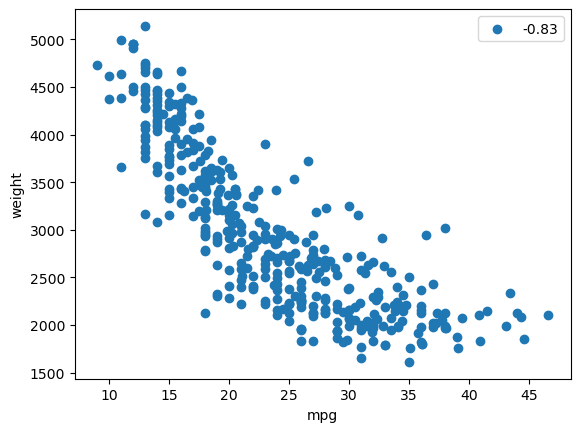

In [22]:
# [4-2] 상관계수 시각화
plt.scatter(dataDF['mpg'],dataDF['weight'],label=round(corrSR['weight'],2))
plt.xlabel('mpg')
plt.ylabel('weight')
plt.legend()
plt.show()

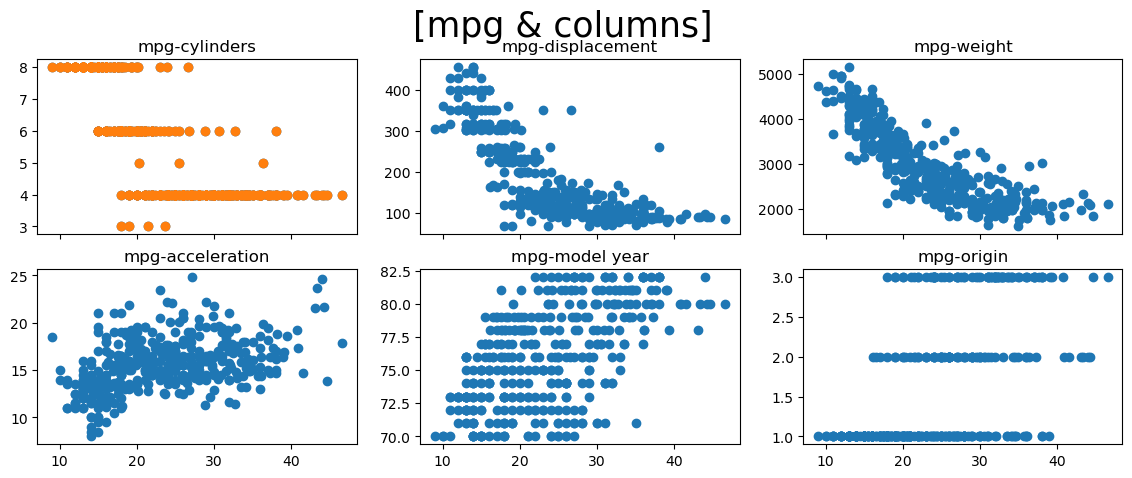

In [50]:
# - [4-3] mpg 컬럼과 다른 컬럼관의 관계 시각화
# - (1) 그래프 담을 창 생성
fig=plt.figure(figsize=(14,5))

# - (2) 그래프 담을 공간 생성 axes
axs=fig.subplots(2,3,sharex=True)
axs[0,0].scatter(dataDF['mpg'],dataDF[corrSR.index[idx+1]])
for row in range(2):
    for col in range(3):
        col_name=corrSR.index[row*3+col+1]
        axs[row,col].scatter(dataDF['mpg'],dataDF[col_name],label=round(corrSR[col_name],2))
        axs[row,col].set_title(f'mpg-{col_name}')

fig.suptitle("[mpg & columns]",fontsize=25)
plt.show()
        

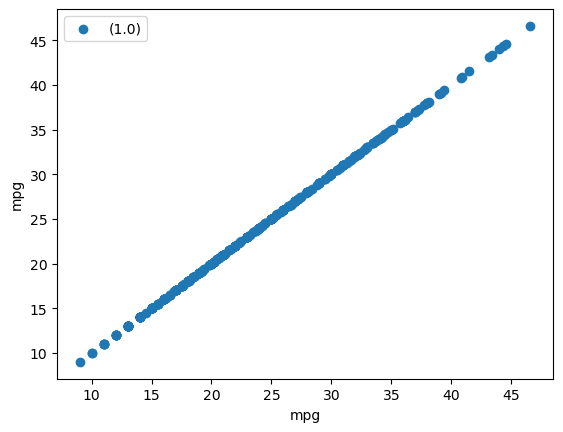

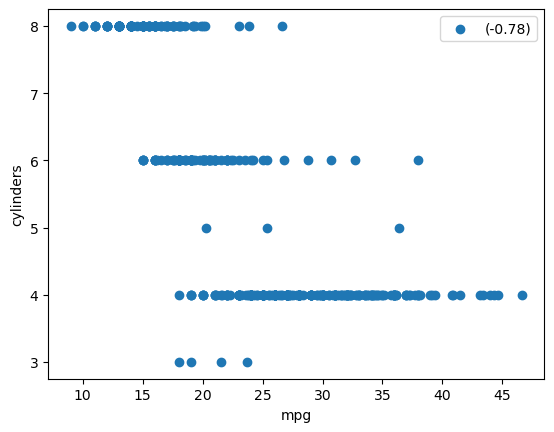

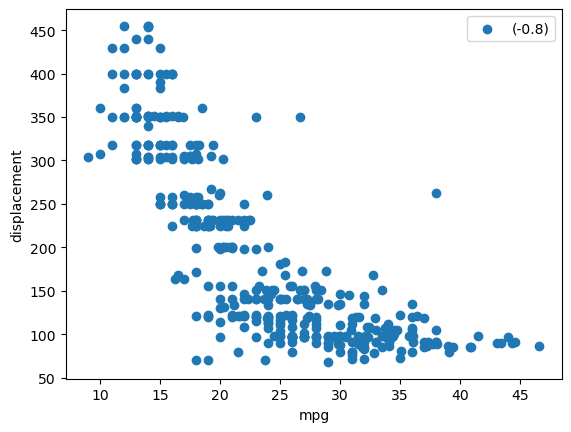

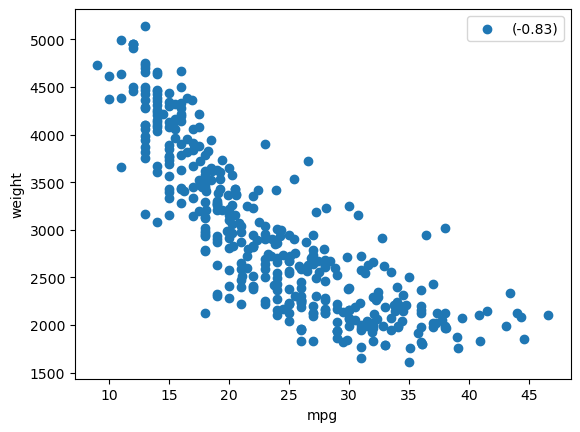

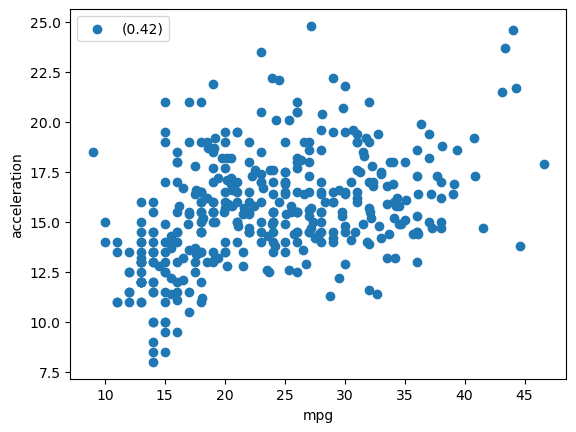

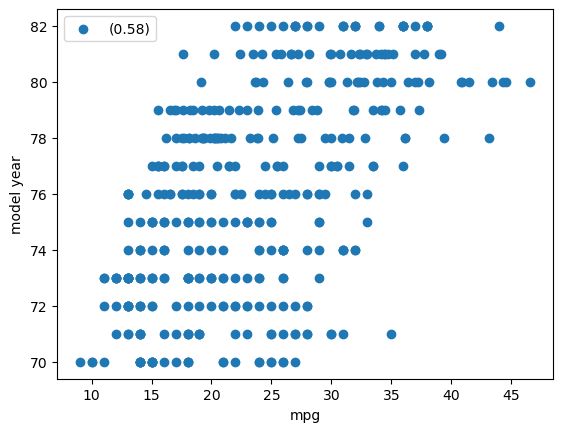

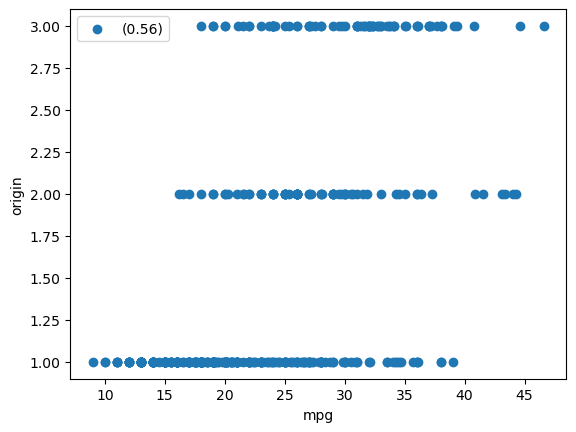

In [30]:
# [4-3] mpg 컬럼과 다른 컬럼과의 관계 시각화
for idx in corrSR.index:
    plt.scatter(dataDF['mpg'],dataDF[idx],label=f'({round(corrSR[idx],2)})')
    plt.xlabel('mpg')
    plt.ylabel(idx)
    plt.legend()
    plt.show()